# Environment and dataset preparations

## Package documentations:

- **[Pandas](https://pandas.pydata.org/docs/)** - Data analysis and manipulation tool.
- **[Numpy](https://numpy.org/devdocs/user/quickstart.html)** - Mathematical library supports for large, multi-dimensional arrays and matrices.


- **[Matplotlib](https://matplotlib.org/contents.html)** - Library for creating various visualizations in Python.
- **[Seaborn](https://seaborn.pydata.org/)** - Statistical data vizualisation.
- **[Plotly](https://plot.ly/python/)** - Interactive graphing library for Python.

- **[scikit-learn](https://scikit-learn.org/)** - machine learning in Python.


- **[Pandas profiling](https://github.com/pandas-profiling/pandas-profiling)** - Generates profile reports from a pandas DataFrame.


In [4]:
import pandas as pd # Data management package
import phik # Correlation package

import numpy as np # Statistics package 

# Visualization packages
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns

import hiplot as hip # Interactive parallel coordinates plot

from pandas_profiling import ProfileReport # Profiling report generator package

In [5]:
sns.set(rc={'figure.figsize':(10,7)})

In [6]:
data = pd.read_csv("https://gist.githubusercontent.com/fandras/44a74003801090b60b3720adb6a3ff24/raw/5a0848db1036e2f37b0dc8b8f2afa2766785fc53/rom.csv")
data.head(5)

,ip,RT,RPT,RTT,location,client.type,DC,start.time,pm.pa,Country,Time
0,10.8.146.179 (laptop),2656.0,1031.0,1625.0,Newcastle,Microsoft client,Redmond DC,1.359748e+09,PM,UK,0
1,10.8.146.179 (laptop),1469.0,719.0,750.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0
2,10.8.146.179 (laptop),1984.0,844.0,1140.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0
3,10.8.146.179 (laptop),2437.0,734.0,1703.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0
4,10.8.146.179 (laptop),1859.0,750.0,1109.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0


# Data Profiling - Presentation
with Pandas Profiling Report

*   application-independent statistical analysis task
*   highlight phenomenon by generating warnings
  * skewness
  * correlation
  * missing values
  * uniqueness
  * (unified, duplicates, constant, zeros, etc.)




## Skewness

> $Sk$: value of distortion or asymmetry in a symmetrical bell curve, or normal distribution 

* value between -1 and 1 
* warning threshold $\text{abs}(Sk)$ > 0.7

![Skewness figure](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/446px-Negative_and_positive_skew_diagrams_%28English%29.svg.png)



**Pearson's skewness:** 

>> $ Sk_1 = \frac{\bar{X}-Mo}{s} $

>> $ Sk_2 = \frac{3\bar{X}-Md}{s} $

where:
* $Sk_1$=Pearson’s first coefficient of skewness and $Sk_2$ the second
* $s$=the standard deviation for the sample
* $\bar{X}$=is the mean value
* $Mo$=the modal value (value that appears most frequently in the dataset)
* $Md$=is the median value

### Skewness example

In [7]:
# Skewness

skewness_warning_list = list()

for col_name in list(data.select_dtypes('number').columns):
    if data[col_name].skew() > 0.9:
        skewness_warning_list.append(col_name)
        
data.skew()
print(skewness_warning_list)

['RT', 'RPT', 'RTT']


C:\Users\X\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\X\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


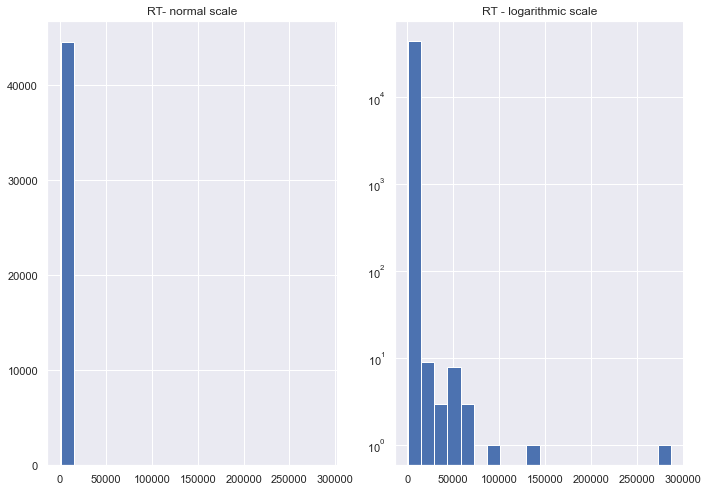

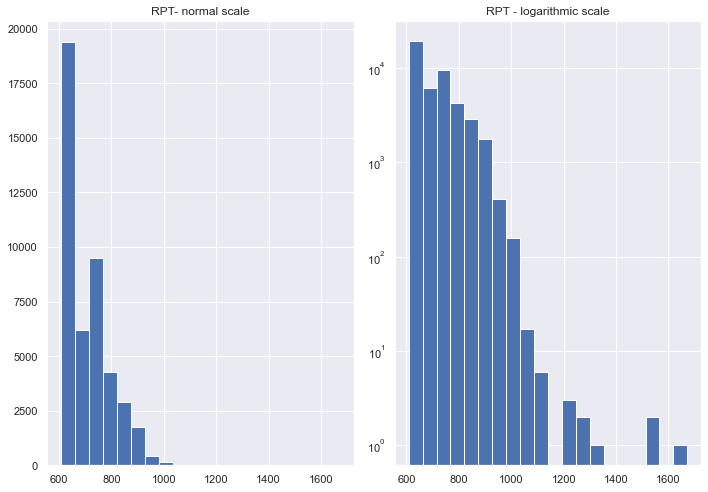

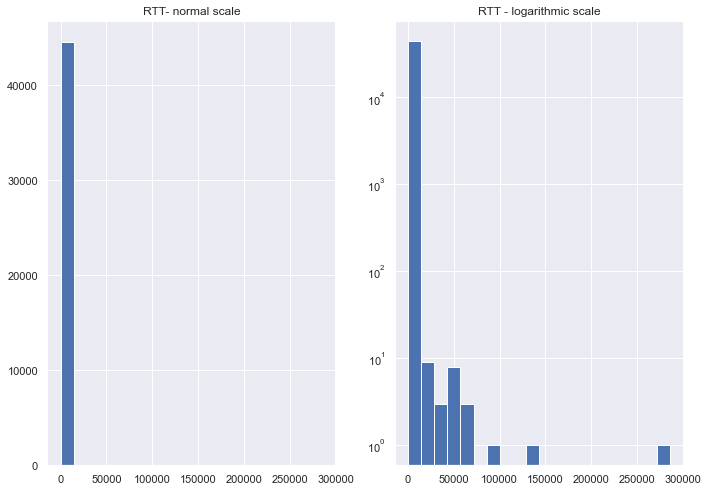

In [8]:
for skewness_warning in skewness_warning_list:
    fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
    axs[0].set_title(str(skewness_warning) + '- normal scale')
    axs[0].hist(data[skewness_warning], bins=20)
    axs[1].set_title(str(skewness_warning) + ' - logarithmic scale')
    axs[1].set_yscale('log')
    axs[1].hist(data[skewness_warning], bins=20)
    fig.show

## Correlations

### Pearson correlation coefficient (PCC)

measures linear correlation between two variables $X$ and $Y$. 

* ranges from -1 to 1.
* +1 is total positive linear correlation
* 0 is no linear correlation
* -1 is total negative linear correlation.
 

>> A value of 1 implies that a linear equation describes the relationship between \varX and \varY perfectly, with all data points lying on a line for which \varY increases as \varX increases. A value of -1 implies that all data points lie on a line for which \varY decreases as \varX increases. A value of 0 implies that there is no linear correlation between the variables.

$ \rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} $

where

* $\operatorname{cov}$ is the covariance
* $ {\displaystyle \sigma _{X}} $ is the standard deviation of $ {\displaystyle X}$
* ${\displaystyle \sigma _{Y}} $ is the standard deviation of $ {\displaystyle Y}$

### Spearman's rank correlation coefficient 

* relationship between two variables described using a monotonic function 
* sign indicates the direction of the association between the variables

$ \rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}} $

where

* ${\displaystyle d}$ is the pairwise distances of the ranks of the variables \Nthvariable{X}{i} and \Nthvariable{Y}{i}. 
* $\displaystyle n$ is the the number of samples. 
\end{itemize}

### Cramér's V 

symmetrical intercorrelation measure of association between two nominal variables

* ranges from 0 to +1
* 0: no association between the variables
* 1: each variable is completely determined by the other.

$ \phi_c = \sqrt{\frac{\chi^2}{N(k - 1)}} $

where 

* $\phi_c$ denotes Cramér's V;
* $X^2$ is the Pearson chi-square statistic from the aforementioned test;
* $N$ is the sample size involved in the test;
* $k$ is the lesser number of categories of either variable.

### PhiK

uniform handling of categorical, ordinal, and interval variables
even in the case of a non-linear dependency

**Between categorical variables**: symmetrical intercorrelation
* 0: no association
* 1: one variable completely determines the other


**Why Phik?** 

> The calculation of correlation coefficients between paired data variables is a standard tool of analysis for every data analyst. Pearson’s correlation coefficient is a de facto standard in most fields, but by construction only works for continuous variables. Pearson is unsuitable for data sets with mixed variable types, e.g. where some variables are ordinal or categorical.


> While many correlation coefficients exist, each with different features, we have not been able to find a correlation coefficient with Pearson-like characteristics and a sound statistical interpretation that works for interval, ordinal and categorical variable types alike.

> The correlation coefficient ϕK
follows a uniform treatment for interval, ordinal and categorical variables, captures non-linear dependencies, and is similar to Pearson’s correlation coefficient in case of a bivariate normal input distribution.

Reference: [https://phik.readthedocs.io/en/latest/](https://phik.readthedocs.io/en/latest/)

Baak, M., Koopman, R., Snoek, H. and Klous, S., 2018. A new correlation coefficient between categorical, ordinal and interval variables with Pearson characteristics. arXiv preprint arXiv:1811.11440. [Link](https://arxiv.org/abs/1811.11440)


#### PhiK example

In [9]:
# PhiK Correlation

interval_cols = ['RT', 'RPT', 'RTT', 'start.time']

c = data.phik_matrix(interval_cols=interval_cols)
print()
corr_warnings =  dict()

for i in c.columns:
    corr_warnings[i] = list()
    for k in c.columns:
        if (c[i][k] > 0.9) & (i!=k):
            corr_warnings[i].append(k)
            
# print(corr_warnings)

<AxesSubplot:>

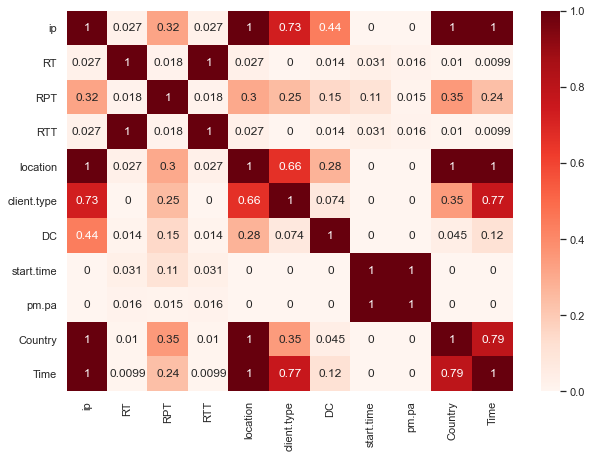

In [10]:
sns.heatmap(c, annot=True, cmap="Reds")

In [ ]:
profile_report = ProfileReport(data, title='Cloud - Pandas Profiling Report', html={'style':{'full_width':True}})
profile_report.to_file("report.html")
profile_report

# Postprocessing the results of profiling

In [ ]:
# Configuration

configuration = dict()

# Thresholds
configuration["skewness_threshold"] = 20
configuration["correlations_threshold"] = 0.9

# Dataset specific configuration
configuration["nan_histogram_column"] = "start.time"

## Missing data

This section provides a quick overview of detecting and identiying **missing data** (*NaN values*)  in the dataset. 

Missing data may originate both 

*   in the system under evaluation  (**nonresponse**, i.e. the system fails to deliver data, or violates timeliness related constraints) and
*   in the instrumentation/processing of the observed data.

This way compensating missing data has to cover both the technical and mathematical analysis aspects.

Technical aspects cover the checking of the instrumentation and a potential root-cause analysis.

Mathematical techniques include deleting the incomplete records or  "fill in", (**impute**) the missing values by interpolation etc.




### The diagnosis workflow

The analysis of the missing data phenomenon follows the general workflow of EDA.  

Missing data is a problem in many applications independently of the target domain. Accordingly, their detection and initial analysis have appropriate support in terms of specialized packages (not addressed here).

 At first, the so-called **drill down** step filters out of the global dataset the observations with missing data. 

 Subsequently, partitioning refinement checks the homogeneity of this subset of data, and if necessary further splits them into homogenous partitions.  

As the next step, the domain expert tries to find matching between the hypothetical root causes in the engineering model (according to the designated diagnostic resolution) and each individual (sub)partition of data.  

This process is typically iterative. 

If the evaluation of a candidate explanation hypothesis needs it, the domain expert executes further EDA/statistical evaluation tasks. 

Note, that traditional EDA leaves all the tasks of interpretation of mathematical results in the engineering context, selection of the candidate hypothesis set, evaluating the matching, refining the mathematical model, etc. to the experience and knowledge of the domain expert.

The final outcome is a candidate set of hypotheses of the potential root-causes.



### Partitioning of missing data

Firstly, filtering extracts data records having missing data.

In [ ]:
# NaN values
def nans(df): 
    return df[df.isnull().any(axis=1)]

nan_data = nans(data)
nan_data

,ip,RT,RPT,RTT,location,client.type,DC,start.time,pm.pa,Country,Time
1175,10.8.146.179 (laptop),NaN,672.0,437.0,Newcastle,Microsoft client,Redmond DC,1.359821e+09,PM,UK,0
2578,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359761e+09,AM,UK,0
2586,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359761e+09,AM,UK,0
2594,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359762e+09,AM,UK,0
2602,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359762e+09,AM,UK,0
4648,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359821e+09,PM,UK,0
8739,204.14.93.62,NaN,NaN,NaN,Secaucus,Java client,Dublin DC,1.359767e+09,AM,USA,-5
10100,208.87.24.149,NaN,NaN,NaN,Secaucus,Java client,Dublin DC,1.359765e+09,AM,USA,-5
23667,64.151.226.119,NaN,NaN,NaN,Burnaby (Canada),Java client,Dublin DC,1.359823e+09,PM,Canada,-8
23772,64.20.37.202,NaN,NaN,NaN,Secaucus,Java client,Dublin DC,1.359748e+09,PM,USA,-5


Two types of missing values are present in the dataset: 
1. Only *RT* is missing (Record #1175). 
2. *RT*, *RPT*, *RTT* values are missing. 

## Initial hypothesis set

Partitioning the dataset of elements containing $\tt{NaN}$ values results in two separate subsets. 
Each of them is internally homogenous, but obviously they differ from each other.

##### Omission of a single vaule

The first case of **record 1175** (characterized by *RT*=NaN,	*RPT*=672.0, *RTT*=437.0)	clearly violates a fundamental metrology constraint, as by the engineering model *RTT=RT+RPT*, but an imputation would result in a negative value of *RT* - impossible for a time duration. 

*   The only valid hypothesis here is some 
measurement or processing fault, as these data originate in the timestamp.

*   No further refinement is possible due the lack of more detailed engineering model.

##### Correlated omissions

The joint feature of the second group of records with missing data the lack of **all  the duration data**. 

* The list of the records indicates, that failures occur   
*  FMEA (failure mode and effects analysis) over the initial system model (see the figure in the introductory part) delivers an initial set of hypotheses consisting of some potential root-causes of these correlated *omission* failures.
* As a measurement campaign has to traverse the simple serial chain along the client-communication channel-server and return path, any of these elements can result in an omission.

* The list of the records indicates, that failures occur at multiple client and server locations, for both types of the client. 

* Under the *single fault assumption*, a single element has a fault, so the fault hypotheses can be restricted to components affecting all the failing records. 
Accordingly, the most probable hypothesis is a **communication fault**.
* As not all records have failures, the fault has to be temporal. 
The subsequent statistical analyses try to refine the hypotheses.


	

### Hypothesis checking and refinement

A potential refinement of the rough granular hypothesis of temporal communication faults needs the identification of factors leading to their activation. 


**Periodicity**
 The temporal distribution of the missing data can reveal the influence of the workload state of the network, for instance by indicating a periodic overload from another source. This wqy, the first evaluation examines the number of **NaN** values by *start.time*

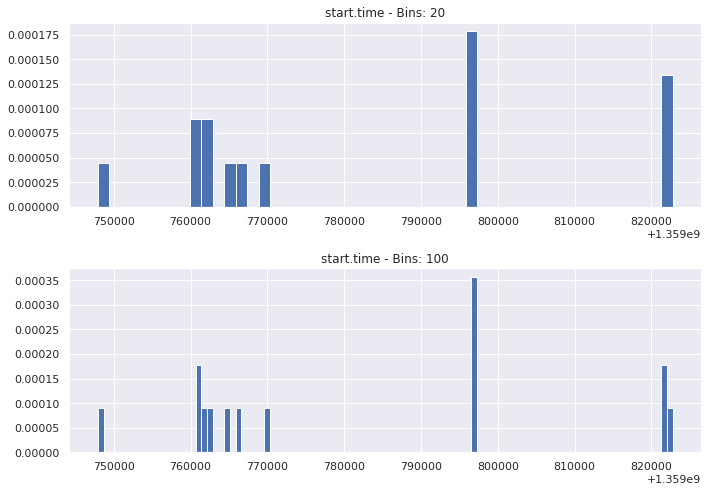

In [ ]:
fig, axs = plt.subplots(2,1, sharey=False, tight_layout=True)

axs[0].set_title(str(configuration["nan_histogram_column"]) + ' - Bins: 20')
axs[0].hist(nan_data[configuration["nan_histogram_column"]], bins=50, density=True, histtype='bar', stacked=True)

axs[1].set_title(str(configuration["nan_histogram_column"]) + ' - Bins: 100')
axs[1].hist(nan_data[configuration["nan_histogram_column"]], bins=100, density=True, histtype='bar', stacked=True)

fig.show()

The appearance of failures does not indicate a periodic behavior.

Correlated failures due to long-time disturbance

In [ ]:
# Calculation the NaN ratio
number_of_nan_rows = nan_data.shape[0]
size = data.shape[0]-number_of_nan_rows

nan_ratio = list()

for i in range(size):
    selected_rows = data.iloc[i:i+number_of_nan_rows]
    nan_in_selected = nans(selected_rows).shape[0]
    ratio = nan_in_selected/number_of_nan_rows
    nan_ratio.append(ratio)
df_nan_ratio = pd.DataFrame(nan_ratio)

Modin Concat Time = 43.28078770637512


Burstiness of the **NaN** values by using a sliding window-based metric check detects, whether the origin of NaN values is are longer disturbances generating multiple correlate NaN effects or independent dropouts. 

The plot presents that there is **no** sign for burstiness of NaN data. The maximum ratio is around *0.25* which means the maximum number of NaN values in a window is very small. 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(df_nan_ratio.shape[0]), y=df_nan_ratio[0], name="hv",line_shape='hv'))
fig.show()

In [ ]:
# Dropping NaN values
if data.isnull().values.any():
    data = data.dropna()


# Filtering negative and the one extreme value

data = data.sort_values(by=['RTT'], ascending=True)
data = data.drop(data.index[-1])
data = data.drop(data.index[0])

As final conclusion, the evaluation was unable to refine the fault hypothesis beyond of most probably uncorrelated temporal communication faults.

## Correlation analysis

The previous example addressed the root cause analysis of missing data. It indicates the general bottleneck that limited observability of the target system under evaluation excludes a deep refinement of the generated model. 

Modern system identification technologies benefit from the availability of a rich variety of monitoring agents for application and platform-related data acquisition and of big data solution for processing the collected observations.

However, observations collected to cover all the expected faults form necessarily a many-dimensional big dataset. 

This set of observations needs reduction by selecting such groups of variables of a mutual strong association using **correlation analysis**. 

Accordingly, their values can be estimated by knowing a proper subset of them (**feature selection**). 

Another main purpose of correlation analysis is to check and potentially reveal causal dependencies. 

This may serve 

* to check the soundness of the data flow (in terms of **controllability**), 
* to find **parasitic couplings** (like the *noisy neighbor* effect by resource sharing), or identify **incidental association phenomena** by random coincidences. 




**Correlation types**

- **Pearson's r**: The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables.
- **Spearman's ρ**: The sign of the Spearman correlation indicates the direction of association between X (the independent variable) and Y (the dependent variable). If Y tends to increase when X increases, the Spearman correlation coefficient is positive. If Y tends to decrease when X increases, the Spearman correlation coefficient is negative. A Spearman correlation of zero indicates that there is no tendency for Y to either increase or decrease when X increases.
- **Cramér's V (φc)**: is a symmetrical intercorrelation measure of association between two nominal variables, giving a value between 0 and +1. 0 meas that there is no association between the variables, 1 means that each variable is completely determined by the other.

**Phi K**


Phi K a relatively new methodology serves as the basis for the correlation analysis for our running example. 
This method facilitates a uniform handling of categorical, ordinal, and interval variables even in the case of a non-linear dependency.

Between the categorical variables the Phi K correlation indicates the symmetrical intercorrelation between the variables. As in Cramér's V, the 0 means no association and 1 means that one variable completely determines the other. 

Reference:
Here we present this analysis task by means of calculating the correlation matrix and visually evaluate it by scatterplots for each correlated variable pair.

The *corr_warnings* dictionary contains the correlated variables. 

M. Baak, R. Koopman, H. Snoek, S. Klous: [A new correlation coefficient between categorical, ordinal and interval variables with Pearson characteristics](https://arxiv.org/abs/1811.11440)

**Example**

The heatmap below shows the Phi K correlation of the CLOUD dataset. 

The correlation between the *IP, Location, Country* and *Time* variables is 1 because there is always one variable that completly determines the other (e.g., *IP $\rightarrow$ Location; Location $\rightarrow$ Country; Country $\rightarrow$ Time*) 



{'ip': ['location', 'Country', 'Time'], 'RT': ['RTT'], 'RPT': [], 'RTT': ['RT'], 'location': ['ip', 'Country', 'Time'], 'client.type': [], 'DC': [], 'start.time': ['pm.pa'], 'pm.pa': ['start.time'], 'Country': ['ip', 'location'], 'Time': ['ip', 'location']}


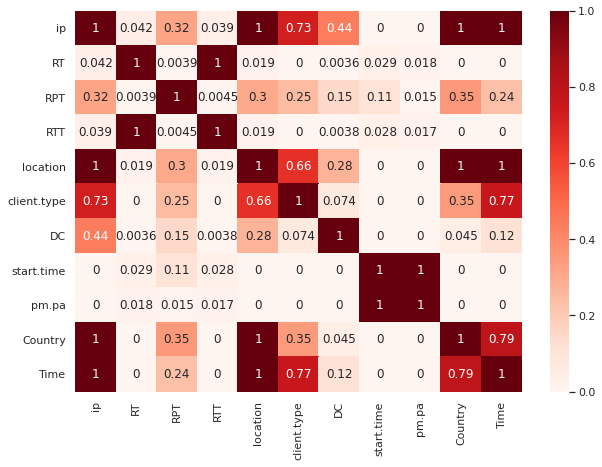

In [ ]:
# PhiK Correlation

interval_cols = ['RT', 'RPT', 'RTT', 'start.time']

c = data.phik_matrix(interval_cols=interval_cols)
print()
corr_warnings =  dict()

for i in c.columns:
    corr_warnings[i] = list()
    for k in c.columns:
        if (c[i][k] > configuration["correlations_threshold"]) & (i!=k):
            corr_warnings[i].append(k)
            
print(corr_warnings)
sns.heatmap(c, annot=True, cmap="Reds")


Scatterplots for each correlated variable pairs.  

In [ ]:
numeric_columns = data.select_dtypes('number').columns

for i in corr_warnings:
    for k in corr_warnings[i]:
        fig = px.scatter(data, x=i, y=k)
        fig.show()
        
        for j in corr_warnings:
            if i in corr_warnings[j]:
                corr_warnings[j].remove(i)

## Skewness

Detemining and checking the variables with skewness warning.

*RT* and *RTT* variables are skewed. They have several outlier variables.  

In [ ]:
# Skewness

skewness_warning_list = list()

for col_name in list(data.select_dtypes('number').columns):
    if data[col_name].skew() > configuration["skewness_threshold"]:
        skewness_warning_list.append(col_name)
        
data.skew()
print(skewness_warning_list)

['RT', 'RTT']


Histograms and boxplots for the skewed variables. 
The histogram presents the variables on normal and on logarithmic scale. 

The boxplots present the values by *locations*.
*Secaucus*, *Durham* and *Lansing* have several outliers.  

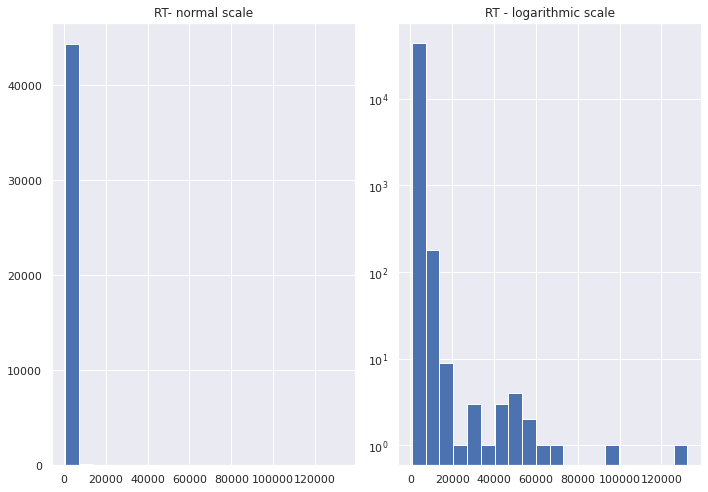

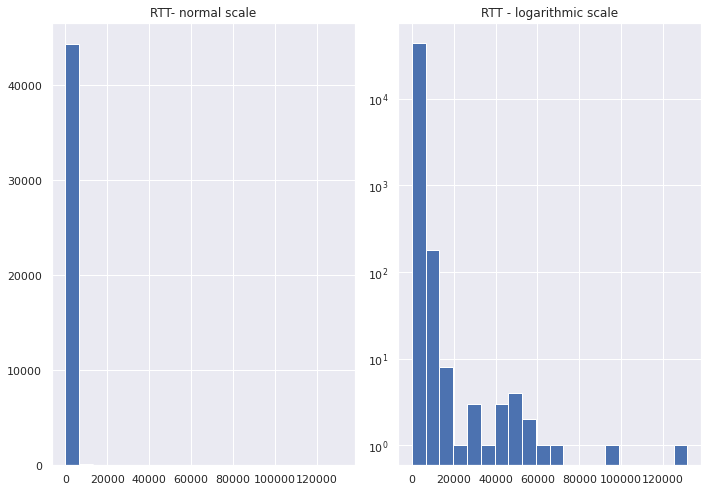

In [ ]:
for skewness_warning in skewness_warning_list:
    fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
    axs[0].set_title(str(skewness_warning) + '- normal scale')
    axs[0].hist(data[skewness_warning], bins=20)
    axs[1].set_title(str(skewness_warning) + ' - logarithmic scale')
    axs[1].set_yscale('log')
    axs[1].hist(data[skewness_warning], bins=20)
    fig.show

In [ ]:
for skewness_warning in skewness_warning_list:
    fig = px.box(data, y=skewness_warning, color="location", notched=False)
    fig.update_layout(yaxis_type="log")
    fig.show()